<a href="https://colab.research.google.com/github/talalqaiser/make-moons-with-KNN/blob/main/Make_moons_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, y = make_moons(n_samples = 5000, noise = 0.1)
print (x.shape, y.shape)

(5000, 2) (5000,)


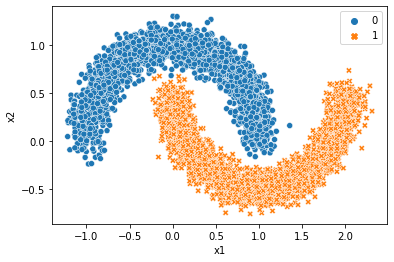

In [3]:
ax = sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, style = y)
ax.set(xlabel = 'x1', ylabel = 'x2')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

minmax = MinMaxScaler()
minmax.fit(x)
xn = minmax.transform(x)

# xtrain, xtest, ytrain, ytest = train_test_split(xn,y, stratify=y, test_size=0.30, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y, test_size=0.30, random_state=42)

print(x)
print(ytrain.shape)
print(xtrain.shape)
print([ytrain.shape, ytest.shape])

[[ 2.05591142  0.40659594]
 [-0.36763378  1.00613812]
 [ 1.04722045 -0.36856675]
 ...
 [ 0.22519306  0.9050436 ]
 [-0.66163216  0.56609106]
 [ 0.99964794  0.38298323]]
(3500,)
(3500, 2)
[(3500,), (1500,)]


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#for KNN we ned to keep the data set because there is no model. so if we need to send the algorithm we cant sent any model, we need to forward the whole data set.
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(xtrain, ytrain)
print(knn.effective_metric_)

#Predict the response for test dataset
y_pred = knn.predict(xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(ytest, y_pred))

euclidean
Accuracy: 1.0


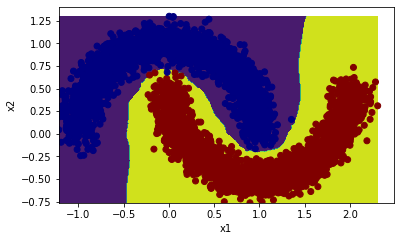

In [8]:
from matplotlib import cm

# plot decision boundary

x1 = np.arange(x[:,0].min()-0, x[:,0].max()+0, 0.01)
x2 = np.arange(x[:,1].min()-0, x[:,1].max()+0, 0.01)
x1g, x2g = np.meshgrid(x1, x2)
z = knn.predict(np.array([x1g.flatten(), x2g.flatten()]).T)

fig, axs = plt.subplots(1,1)
axs.contourf(x1g, x2g, z.reshape(x1g.shape))

#plot the scatter plot of the dataset
axs.scatter(x[:,0],x[:,1], c=y, cmap=cm.jet)
plt.xlabel('x1')
plt.ylabel('x2')
#axs.axis('equal')
axs.set_aspect('equal', 'box')
plt.show()